In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("hotel_review.csv")

In [3]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [5]:
df.shape

(515738, 17)

# Data Preprocessing

In [10]:
df["reviews"]= df["Negative_Review"] + df["Positive_Review"]
df["reviews"]

0          I am so angry that i made this post available...
1         No Negative No real complaints the hotel was g...
2          Rooms are nice but for elderly a bit difficul...
3          My room was dirty and I was afraid to walk ba...
4          You When I booked with your company on line y...
                                ...                        
515733     no trolly or staff to help you take the lugga...
515734     The hotel looks like 3 but surely not 4  Brea...
515735     The ac was useless It was a hot week in vienn...
515736    No Negative The rooms are enormous and really ...
515737     I was in 3rd floor It didn t work Free Wife  ...
Name: reviews, Length: 515738, dtype: object

### Creating the label 

In [12]:
df["is_bad_review"]= df["Reviewer_Score"].apply(lambda x: 1 if x <5 else 0)

In [13]:
df["is_bad_review"]

0         1
1         0
2         0
3         1
4         0
         ..
515733    0
515734    0
515735    1
515736    0
515737    0
Name: is_bad_review, Length: 515738, dtype: int64

In [15]:
df= df[["reviews", "is_bad_review"]]

In [16]:
df.head()

,reviews,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


## Sampling Data

In [17]:
df= df.sample(frac= 0.2, replace= False, random_state= 42)

## Cleaning Data

In [18]:
df["reviews"]= df["reviews"].apply(lambda x: x.replace("No Negative", " ").replace("No Positive", " "))

In [20]:
import nltk

In [21]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from nltk.corpus import wordnet

In [24]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

In [25]:
import string

In [27]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [36]:
def clean_text(text):
    #Lower text
    text= text.lower()
    #tokenize and remove punctuation
    text= [word.strip(string.punctuation)for word in text.split(" ")]
    #remove words that contain numbers
    text= [word for word in text if not any(c.isdigit() for c in word)]
    #remove stopwords
    stop= stopwords.words('english')
    text= [x for x in text if x not in stop]
    # remove empty tokens
    text= [t for t in text if len(t)> 0]
    # pos tag text
    pos_tags= pos_tag(text)
    
    #Lemmatize Text:
    text= [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #remove words with only one letter
    
    text = [t for t in text if len(t)>1]
    #join all
    text= " ".join(text)
    return (text)

In [37]:
#clean text data
df["review_clean"]= df["reviews"].apply(lambda x: clean_text(x))


,reviews,is_bad_review,review_clean
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...
274649,No tissue paper box was present at the room,0,tissue paper box present room
374688,Pillows Nice welcoming and service,0,pillow nice welcome service
404352,Everything including the nice upgrade The Ho...,0,everything include nice upgrade hotel revamp s...
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff


In [39]:
df.head()

,reviews,is_bad_review,review_clean
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...
274649,No tissue paper box was present at the room,0,tissue paper box present room
374688,Pillows Nice welcoming and service,0,pillow nice welcome service
404352,Everything including the nice upgrade The Ho...,0,everything include nice upgrade hotel revamp s...
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff


# Feature Engineering

In [43]:
# add sentiment analysis columns

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Assuming 'df' is your DataFrame and 'reviews' is the column containing the text data
df["sentiments"] = df["reviews"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)


In [44]:
df.head()

,reviews,is_bad_review,review_clean,neg,neu,pos,compound
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908
404352,Everything including the nice upgrade The Ho...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717


In [47]:
# add number of character column

df["nb_chars"]= df["reviews"].apply(lambda x: len(x))
# add number of words column
df["nb_words"]= df["reviews"].apply(lambda x: len(x.split(" ")))

In [50]:
df.head()

,reviews,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,45,11
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7
404352,Everything including the nice upgrade The Ho...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,156,28
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,33,8


In [53]:
!pip install gensim

In [57]:
import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents= [TaggedDocument(doc, [i]) for i, doc in enumerate(df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size= 5, window= 2, min_count=1 , workers= 4)

#transform each document into vector data
doc2vec_df= df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns= ["doc2vec_vector_"+ str(x) for x in doc2vec_df.columns]
df= pd.concat([df, doc2vec_df], axis= 1)

In [58]:
df.head()

,reviews,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,0.039184,0.472009,-0.068463,-0.041143,0.006309
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,45,11,0.039044,0.092442,0.039705,-0.086903,-0.060174
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,0.027557,0.015224,0.041752,-0.106010,-0.143084
404352,Everything including the nice upgrade The Ho...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,156,28,-0.148324,0.129770,0.074180,-0.119338,-0.092448
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,33,8,0.002687,0.090445,0.071489,-0.106665,-0.037526


### Adding TF-IDF columns

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(min_df= 10)
tfidf_result= tfidf.fit_transform(df["review_clean"]).toarray()
tfidf_df= pd.DataFrame(tfidf_result, columns= tfidf.get_feature_names_out())
tfidf_df.columns= ["word_"+str(x) for x in tfidf_df.columns]
tfidf_df.index= df.index
df= pd.concat([df, tfidf_df], axis= 1)


In [64]:
df.head()

,reviews,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_youth,word_youtube,word_yr,word_yuk,word_yummy,word_zero,word_ziggo,word_zone,word_zoo,word_zuid
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,0.039184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,45,11,0.039044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,0.027557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,Everything including the nice upgrade The Ho...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,156,28,-0.148324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,33,8,0.002687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df.shape 

(103148, 5397)

# Exploratory Data Analysis

In [67]:
# Reviews Distribution
df["is_bad_review"].value_counts(normalize= True)

0    0.956393
1    0.043607
Name: is_bad_review, dtype: float64

huge amount of people have positive words to say about 95 percent <br>
while 4 % have negative things to say

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


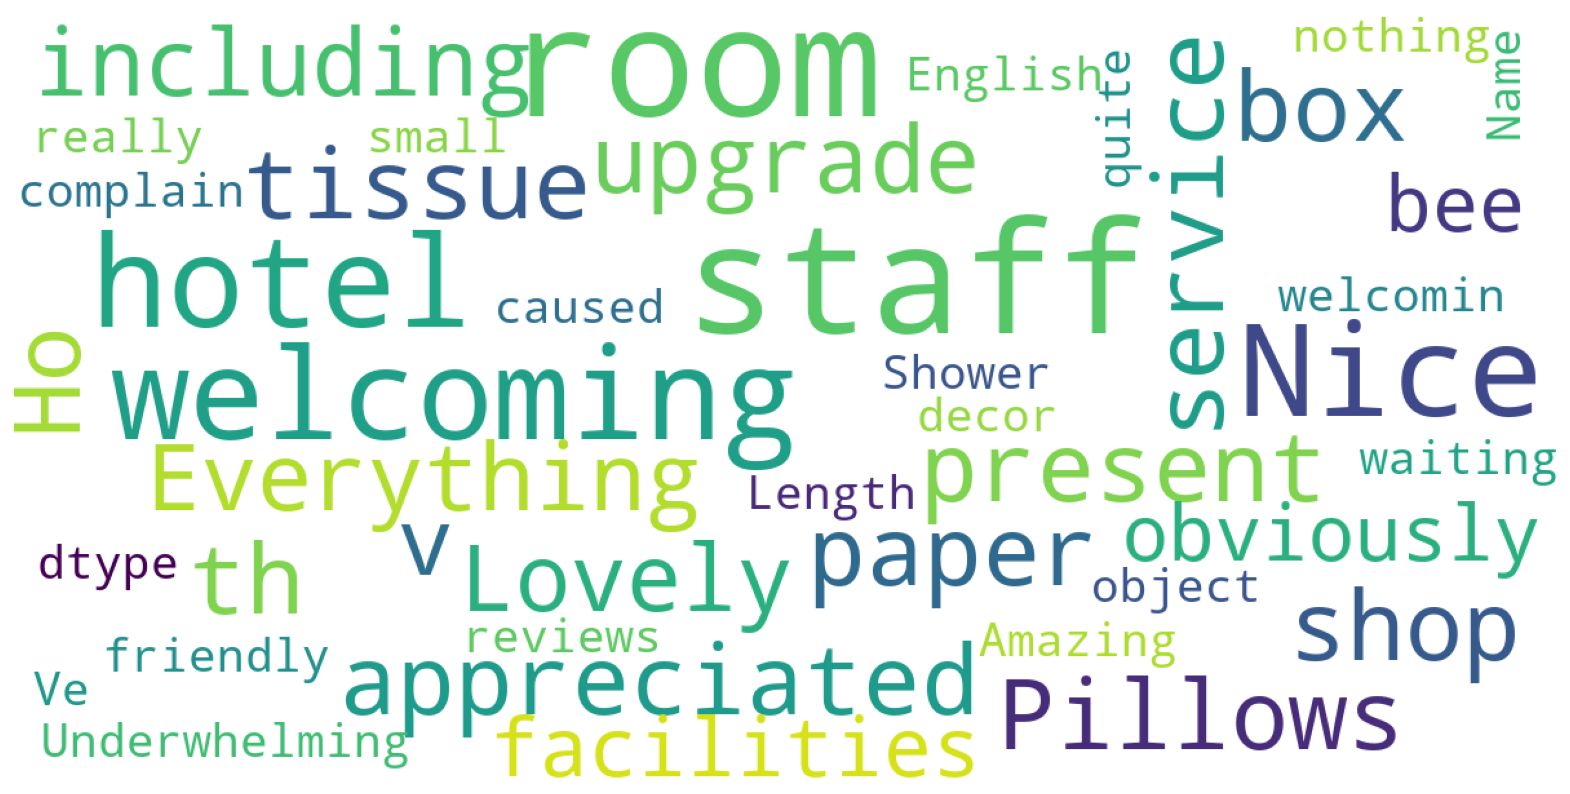

In [73]:
def show_wordcloud(data, title= None):
    wordcloud= WordCloud(
    background_color= 'white', 
    max_words= 200, 
    max_font_size= 40, 
    scale= 3,
    random_state= 42).generate(str(data))
    
    fig= plt.figure(1, figsize= (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize= 20)
        fig.subplots_(adjust(top= 2.3))
    
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df["reviews"])
        

In [75]:
# highest positive sentiment reviews (more than 5 words)

df[df["nb_words"]>= 5].sort_values("pos", ascending= False)[["reviews", "pos"]].head(10)

,reviews,pos
173978,clean comfortable attractive,1.000
180510,A super friendly welcome,1.000
140755,A friendly welcome,1.000
344974,Nice lobby,1.000
43101,A perfect location comfortable great value,0.931
192385,Clean comfortable friendly helpful staff,0.923
263366,Friendly Smiling Efficient Helpful staff,0.922
388503,Efficient friendly smiling fair price,0.919
384291,Super helpful friendly staff,0.908
55329,Clean comfortable excellent location,0.907


In [76]:
# lowest negative sentiment reviews (more than 5 words)

df[df["nb_words"]>= 5].sort_values("neg", ascending= False)[["reviews", "neg"]].head(10)

,reviews,neg
398554,Bad A C,1.000
319196,Nothing Classy calm perfect,0.880
476092,All No no no,0.868
67391,Abusive sarcastic m staff,0.861
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
182887,Weird uncomfortable bathtub,0.811
257984,Nothing Friendly courteous happy staff,0.806
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799


In [77]:
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_17568\1088059045.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist= False, label = label)
C:\Users\user\AppData\Local\Temp\ipykernel_17568\1088059045.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset

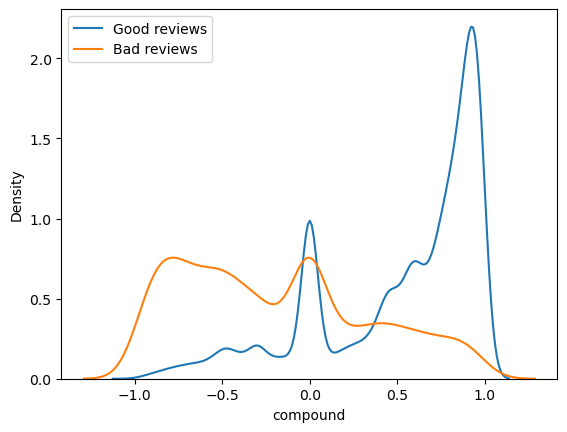

In [79]:
for x in [0, 1]:
    subset= df[df['is_bad_review']==x]
    
    if x==0:
        label= "Good reviews"
    else: 
        label= "Bad reviews"
    sns.distplot(subset['compound'], hist= False, label = label)
    plt.legend()

# Model Building

In [82]:
# feature selection

label= "is_bad_review"
ignore_cols= [label, "reviews", "review_clean"]
features= [c for c in df.columns if c not in ignore_cols]

# Split into train and test 
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(df[features], df[label], test_size= 0.2, random_state= 42)

# Training Random Forest Classifier

In [83]:
rf= RandomForestClassifier(n_estimators= 100, random_state= 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
# Show importance feature

feature_importance_df= pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending= False)
feature_importance_df.head(10)

,feature,importance
3,compound,0.037351
2,pos,0.024002
0,neg,0.023305
6,doc2vec_vector_0,0.021765
10,doc2vec_vector_4,0.018254
8,doc2vec_vector_2,0.017701
9,doc2vec_vector_3,0.017396
7,doc2vec_vector_1,0.016952
4,nb_chars,0.016583
1,neu,0.014489


In [85]:
# ROC Curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


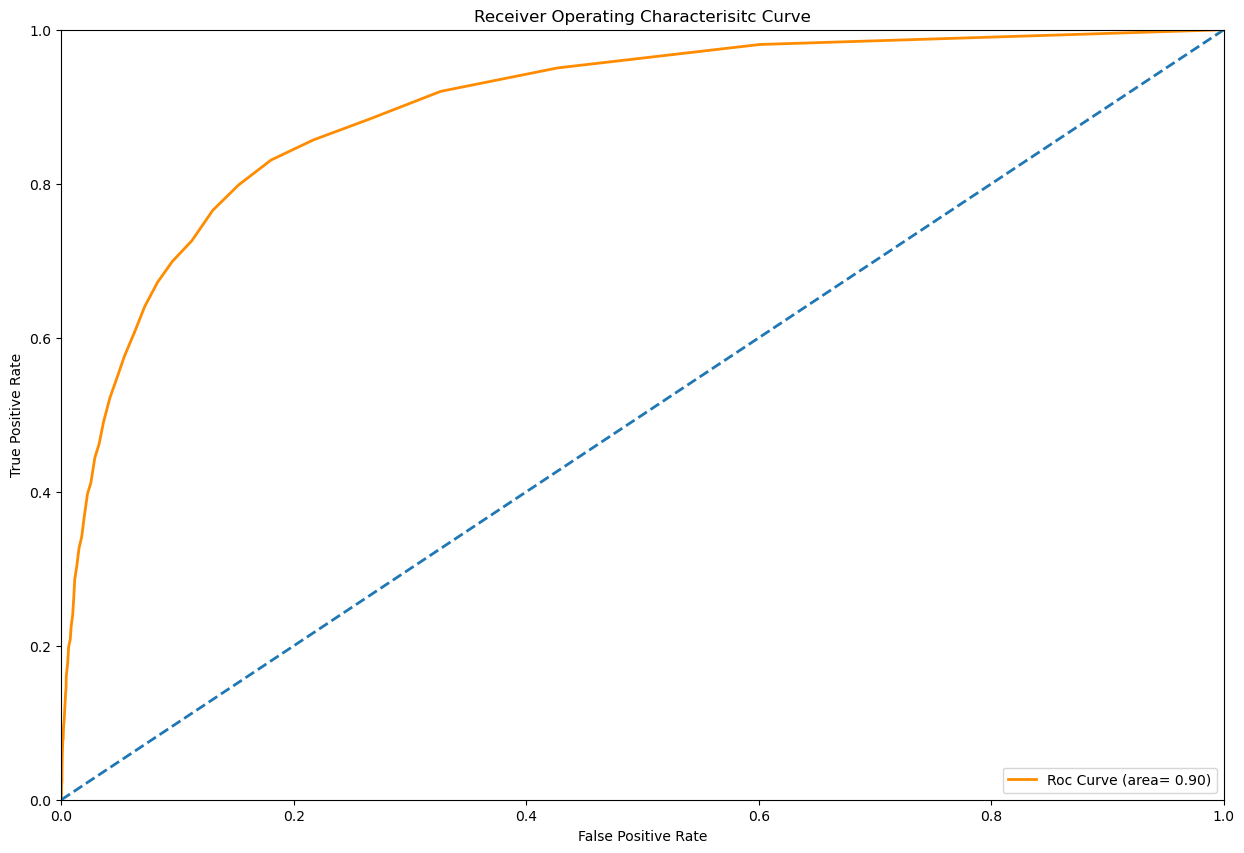

In [88]:
y_pred= [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds= roc_curve(y_test, y_pred, pos_label= 1)

roc_auc= auc(fpr, tpr)

plt.figure(1, figsize= (15, 10))
lw= 2
plt.plot(fpr, tpr, color= 'darkorange', 
        lw= lw, label= 'Roc Curve (area= %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], lw= lw, linestyle= '--')
plt.xlim([0, 1])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characterisitc Curve")
plt.legend(loc= "lower right")
plt.show()